<ipython-input-24-b59fe82728b7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
<ipython-input-24-b59fe82728b7>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(pd.Series(0, index=df.columns), ignore_index=True)
<ipython-input-24-b59fe82728b7>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(pd.Series(0, index=df.columns), ignore_index=True)
<ipython-input-24-b59fe82728b7>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(pd.Series(0, index=df.columns), ignore_index=True)
<ipython-input-24-b59fe82728b7>:10: FutureWarning: The frame.append

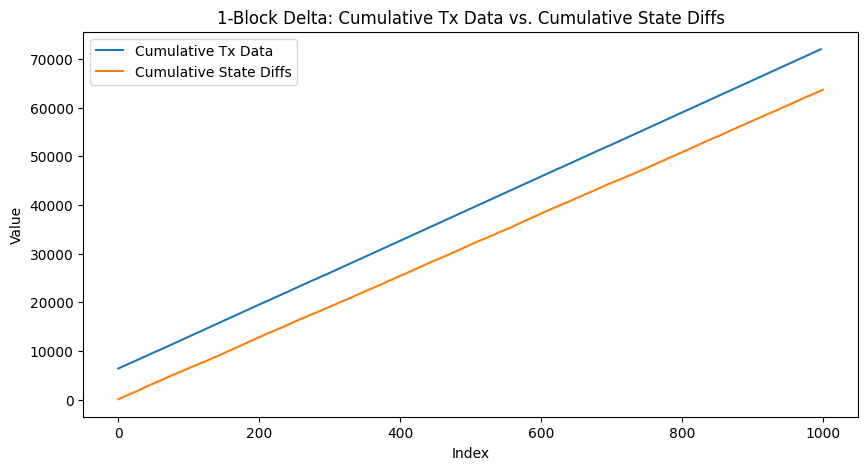

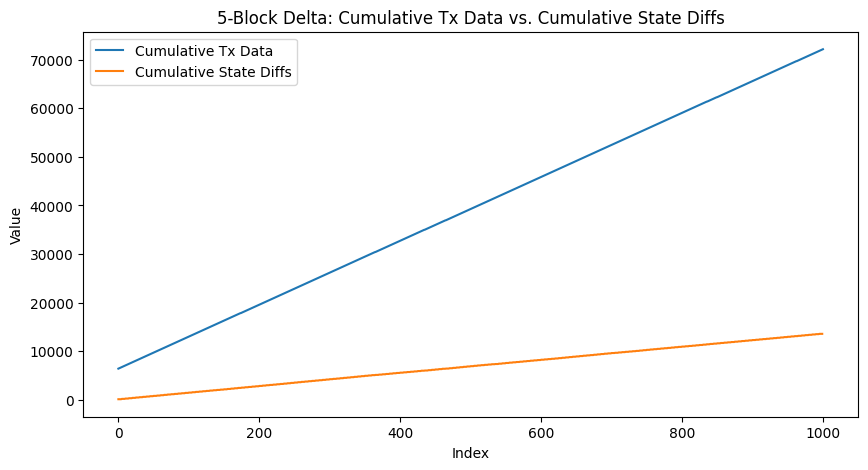

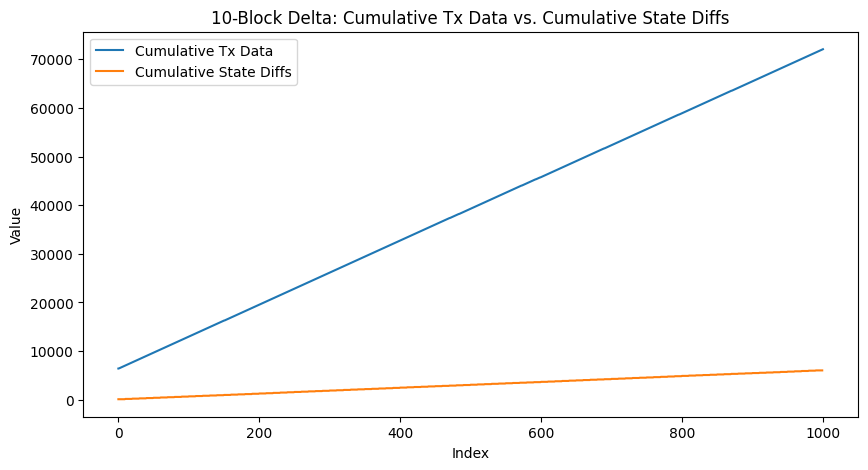

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
def insert_zeros(df, n):
    new_df = pd.DataFrame()
    for i, row in df.iterrows():
        new_df = new_df.append(row)
        for _ in range(n - 1):
            new_df = new_df.append(pd.Series(0, index=df.columns), ignore_index=True)
    return new_df

# Read CSV files into pandas DataFrames
df1_txdata = pd.read_csv("1_txdata.csv")
df1_statediff = pd.read_csv("1_statediff.csv")
df5_txdata = pd.read_csv("5_txdata.csv")
df5_statediff = pd.read_csv("5_statediff.csv")
df10_txdata = pd.read_csv("10_txdata.csv")
df10_statediff = pd.read_csv("10_statediff.csv")

# Insert zeros between state diff values for df5 and df10
df5_statediff = insert_zeros(df5_statediff, 5)
df10_statediff = insert_zeros(df10_statediff, 10)

# Merge txdata and statediff DataFrames for each delta value
df1 = pd.concat([df1_txdata["Tx Data"], df1_statediff["State Diffs"]], axis=1)
df5 = pd.concat([df5_txdata["Tx Data"], df5_statediff["State Diffs"]], axis=1)
df10 = pd.concat([df10_txdata["Tx Data"], df10_statediff["State Diffs"]], axis=1)

# Function to plot the graphs for each delta value
def plot_graph(df, delta):
    plt.figure(figsize=(10, 5))
    plt.plot(df["Tx Data"].cumsum(), label="Cumulative Tx Data")
    plt.plot(df["State Diffs"].cumsum(), label="Cumulative State Diffs")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.title(f"{delta}-Block Delta: Cumulative Tx Data vs. Cumulative State Diffs")
    plt.legend()
    plt.show()

# Plot the graphs for each delta value
plot_graph(df1, 1)
plot_graph(df5, 5)
plot_graph(df10, 10)